Interest rate calculator

In [2]:
import numpy as np
import numpy_financial as npf
import pandas as pd

#Variable depending on neighbor hood
real_estate_tax = 0.0277

#USA average for a person with excellent (800+) credit
mortgage_rate = 0.0350

#Amount in the savings account
down_payment = np.array(range(30000,120000,1000))

#Predicting a 30 year mortgage period
mortgage_length = 30

#The value of $110 is an USA average
home_insurance = 110

#PMI rate is on the high end 
pmi_rate = 0.0100

#HOME PRICE
home_price = 400e3

In [25]:
#Calculate monthly PMI for a mortgage payment
pmi = []
for pmt in down_payment:
    if pmt >= home_price * 0.20:
        pmi.append(0)
    else:
        pmi.append(((home_price - pmt) * pmi_rate) / 12)

pmi = np.array(pmi)


monthly_payment = -(npf.pmt(mortgage_rate/12, mortgage_length*12, home_price - down_payment)) + \
                   (home_price * real_estate_tax) / 12 + \
                    home_insurance + \
                    pmi
#print(monthly_payment)

In [4]:
pmts_df = pd.DataFrame({
    "Down_Payment": down_payment,
    "Monthly_Mortgage_Payment": monthly_payment,
    "PMI": pmi
})

print(pmts_df)

    Down_Payment  Monthly_Mortgage_Payment         PMI
0          30000               3003.132012  308.333333
1          31000               2997.808231  307.500000
2          32000               2992.484451  306.666667
3          33000               2987.160671  305.833333
4          34000               2981.836891  305.000000
..           ...                       ...         ...
85        115000               2313.110694    0.000000
86        116000               2308.620247    0.000000
87        117000               2304.129800    0.000000
88        118000               2299.639353    0.000000
89        119000               2295.148906    0.000000

[90 rows x 3 columns]


-5.323780211421308
-5.323780211421763


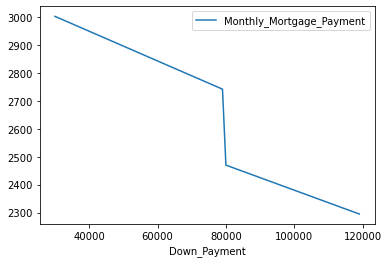

In [5]:
pmts_df.plot(x = "Down_Payment", y = "Monthly_Mortgage_Payment")

slope_1 = (monthly_payment[3] - monthly_payment[2])
slope_2 = (monthly_payment[8] - monthly_payment[7])
print(slope_1)
print(slope_2)

In [40]:
class Mortgage:
    def __init__(self, rate, dwn_pmt, price, period, tax_rate, pmi):
        self.mortgage_pmt = npf.pmt(rate / 12, period * 12, price - dwn_pmt)
        self.tax_pmt = (price - dwn_pmt) * tax_rate / 12
        if(dwn_pmt >= price * 20):
            self.pmi = 0
        else:
            self.pmi = price * pmi / 12

mortgage_class_1 = Mortgage(mortgage_rate, 30000, 430e3,30,0.0300,0.0100)

print("Monthly mortgage payment: %d" % mortgage_class_1.mortgage_pmt)
print("Monthly taxes: %d" % mortgage_class_1.tax_pmt)
print("Private Mortgage Insurance: %d" % mortgage_class_1.pmi)


Monthly mortgage payment: -1796
Monthly taxes: 1000
Private Mortgage Insurance: 358


In [43]:
mortgage_3_5 = Mortgage(0.035, 30e3, 400e3, 30, 0.0300, 0.0100)

print(mortgage_3_5.mortgage_pmt)


-1661.4653448926467
